<a id='Top'></a>
# <center>Week 3 Lecture Notes: Pandas and Plotting Data</center>

<ul>
    <li><a href='#Pandas'>Module 2.0. Pandas</a></li>
    <li><a href='#Plotting'>Module 2.1. Plotting with Pandas</a></li>
</ul>



<a id='Pandas'></a>


# Module 2.0 Pandas

For the rest of the semester, we are going to start focussing on the tools available to solve the hydrogeologic issues that we discuss in class. Homework 3 is going to plot data

To do this, we need to be able to do three main things in Python:

<ul>
    <li>Import large datasets</li>
    <li>Plot the data</li>
</ul>

For this, we are going to need to take advantage of the following libraries:

<ul>
    <li>Pandas Data Analysis Library</li>
    <li>Matplotlib</li>
</ul>

Let's import the libraries that we are going to use today. We will discuss them further as we introduce them.

In [59]:
# import pandas with alias pd
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Pandas

The Python Data Analysis Library, or Pandas, is an open source library providing high-performance, easy-to-use data structures and data analysis tools for Python.

https://pandas.pydata.org/

<img src = "https://d1o50x50snmhul.cloudfront.net/wp-content/uploads/2017/06/14111650/00000-00568744-800x533.jpg"/>

### Import Pandas

To import Pandas, we type:

`import pandas as pd`

pd is an alias used by most Python coders.

### Pandas Data Types

We will use two data types this semester, `DataSeries` and `DataFrames`. Here is a nice description of the differences: https://towardsdatascience.com/pandas-series-dataframe-explained-a178f9748d46. 

Let's first explore a `data series`, by creating a simple list. Recall from last time that a list is a data type native to Python that is defined using square brackets.

In [14]:
#test list
tl = [1,2,3]

It is easy to convert a `list` to a `DataSeries`. 

In [16]:
#convert list to data series
ds = pd.Series(tl)
print(ds)

0    1
1    2
2    3
dtype: int64


The `DataSeries` is still a 1D array, but it now has indices and values. The index defaults to a zero-indexed list incrementing by one, but it can actually be anything. Let's create a `DataSeries` with names of students in a class and scores on an assignment.

In [17]:
#list of names
names = ['George','Frank','Estelle',"Lloyd"]
#list of scores
scores = [15,23,25,25]

Now let's create a Series, using the same function but with some revised arguments.

In [18]:
ds_scores = pd.Series(data = scores,index=names)
print(ds_scores)

George     15
Frank      23
Estelle    25
Lloyd      25
dtype: int64


Success! Hmm, but I would like those scores in percentages, and this assignment is out of 30 points. When working with lists, we had to invoke a loop to do this kind of work (or a list comprehension, which is effectively a loop). With a data series, it is much simpler, we can divide the data series by 30 to get the percentages!

In [19]:
ds_perc = ds_scores/30
print(ds_perc)

George     0.500000
Frank      0.766667
Estelle    0.833333
Lloyd      0.833333
dtype: float64


Probably need to curve this, let's be lazy and just add 15 points to everybody's score. Will it be just as easy as before?

In [20]:
ds_curv = ds_perc+15
print(ds_curv)

George     15.500000
Frank      15.766667
Estelle    15.833333
Lloyd      15.833333
dtype: float64


Ha ha, almost, but forgot to multiply the scores by 100 first. Let's try again.

In [21]:
ds_curv = 100*ds_perc+15
print(ds_curv)

George     65.000000
Frank      91.666667
Estelle    98.333333
Lloyd      98.333333
dtype: float64


Okay, I think we are done adjusting scores, and see how easy this is! You have very likely had to do similar work in Excel, and luckily, Pandas and Excel work very well together.

### Pandas as an Excel substitute

Pandas allows for much of the same functionality as Excel. Pandas has a data type called `DataFrame` that works on the same principle of rows and columns as excel. Each row has an index, and each column has a heading.

It is relatively simple to read an Excel file into Python with Pandas using the `pd.read_excel()` function. Similar in functionality, we can also read CSV files using `pd.read_csv()`. The output is a DataFrame.

In [60]:
# read a csv file from the ISWS website
# 'http://aqueduct.isws.illinois.edu/data/381651_HRY-91C_hyd.csv'
df = pd.read_csv('http://aqueduct.isws.illinois.edu/data/381651_HRY-91C_hyd.csv')
df

,RECORD,TIMESTAMP,depth_to_water_from_land_surface,head
0,0,2014-08-14 14:00:00,26.59,584.06
1,1,2014-08-14 15:00:00,26.58,584.07
2,2,2014-08-14 16:00:00,26.58,584.07
3,3,2014-08-14 17:00:00,26.59,584.06
4,4,2014-08-14 18:00:00,26.61,584.04
...,...,...,...,...
53992,67282,2020-11-20 10:00:00,11.73,598.92
53993,67283,2020-11-20 11:00:00,11.73,598.92
53994,67284,2020-11-20 12:00:00,11.73,598.92
53995,67285,2020-11-20 13:00:00,11.73,598.92


As you can see above, all columns are imported into the DataFrame. If you want to work with a single column within a DataFrame, it is relatively simple using the format `DataFrame.ColumnName` or `DataFrame['ColumnName']`. This returns a `DataSeries`, which is discussed above.

In [61]:
#DataFrame[ColumnName]
df['head']

0        584.06
1        584.07
2        584.07
3        584.06
4        584.04
          ...  
53992    598.92
53993    598.92
53994    598.92
53995    598.92
53996    598.92
Name: head, Length: 53997, dtype: float64

The depth to water and head above mean sea leavel are in feet. This dataframe makes the mistake of not clearly labeling this. Let's change names of the columns in the DataFrame to address this. 

In [62]:
# change head to head_ft

# change depth_to_water_from_land_surface to dtw_ft

df = df.rename(columns={"RECORD": "record", "TIMESTAMP": "timestamp", "depth_to_water_from_land_surface": "dtw_ft", "head": "head_ft"})
df

,record,timestamp,dtw_ft,head_ft
0,0,2014-08-14 14:00:00,26.59,584.06
1,1,2014-08-14 15:00:00,26.58,584.07
2,2,2014-08-14 16:00:00,26.58,584.07
3,3,2014-08-14 17:00:00,26.59,584.06
4,4,2014-08-14 18:00:00,26.61,584.04
...,...,...,...,...
53992,67282,2020-11-20 10:00:00,11.73,598.92
53993,67283,2020-11-20 11:00:00,11.73,598.92
53994,67284,2020-11-20 12:00:00,11.73,598.92
53995,67285,2020-11-20 13:00:00,11.73,598.92


# Example Problem

As with `Data Series`, unit conversions are very simple to conduct in a `Data Frame`. Let's add a column that shows the head in meters above mean sea level. Click on the extremely short video to see me write this code.

If you want to watch me write this code and briefly discuss Pandas, check out this video:
https://mediaspace.illinois.edu/media/t/1_qcg1nwcq

In [66]:
# in the data frame we imported, let's convert head_ft and assign to a new column, head_m




























,record,timestamp,dtw_ft,head_ft,head_m
0,0,2014-08-14 14:00:00,26.59,584.06,178.067073
1,1,2014-08-14 15:00:00,26.58,584.07,178.070122
2,2,2014-08-14 16:00:00,26.58,584.07,178.070122
3,3,2014-08-14 17:00:00,26.59,584.06,178.067073
4,4,2014-08-14 18:00:00,26.61,584.04,178.060976
...,...,...,...,...,...
53992,67282,2020-11-20 10:00:00,11.73,598.92,182.597561
53993,67283,2020-11-20 11:00:00,11.73,598.92,182.597561
53994,67284,2020-11-20 12:00:00,11.73,598.92,182.597561
53995,67285,2020-11-20 13:00:00,11.73,598.92,182.597561


In [12]:
# convert head_ft and assign to a new column, head_m
df['head_m'] = df['head_ft']/3.28
df

,record,timestamp,dtw_ft,head_ft,head_m
0,0,2014-08-14 14:00:00,26.59,584.06,178.067073
1,1,2014-08-14 15:00:00,26.58,584.07,178.070122
2,2,2014-08-14 16:00:00,26.58,584.07,178.070122
3,3,2014-08-14 17:00:00,26.59,584.06,178.067073
4,4,2014-08-14 18:00:00,26.61,584.04,178.060976
...,...,...,...,...,...
53992,67282,2020-11-20 10:00:00,11.73,598.92,182.597561
53993,67283,2020-11-20 11:00:00,11.73,598.92,182.597561
53994,67284,2020-11-20 12:00:00,11.73,598.92,182.597561
53995,67285,2020-11-20 13:00:00,11.73,598.92,182.597561


<a id='Plotting'></a>



# Module 2.1 Plotting Data with Pandas

The next major thing that we want to do is visualize this data in a hydrograph, just like we did with the northeastern Illinois data in Module 1. Plotting data with Pandas is generally easy, let's give it a try!

If you took a break after Module 2.0, go ahead and run this code block.

In [23]:
# import math
import math
# import pandas with alias pd
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

In [24]:
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/381651_HRY-91C_hyd.csv')
wellhead

,RECORD,TIMESTAMP,depth_to_water_from_land_surface,head
0,0,2014-08-14 14:00:00,26.59,584.06
1,1,2014-08-14 15:00:00,26.58,584.07
2,2,2014-08-14 16:00:00,26.58,584.07
3,3,2014-08-14 17:00:00,26.59,584.06
4,4,2014-08-14 18:00:00,26.61,584.04
...,...,...,...,...
53992,67282,2020-11-20 10:00:00,11.73,598.92
53993,67283,2020-11-20 11:00:00,11.73,598.92
53994,67284,2020-11-20 12:00:00,11.73,598.92
53995,67285,2020-11-20 13:00:00,11.73,598.92


Before plotting, let's talk a little about indices. These are effectively your row numbers, or at least, that's how this example starts out. The indices are the values in the first column, and can be used to help reference your data. You can also extract just the indices using `DataFrame.Index`

In [25]:
#DataFrame.Index
wellhead.index

RangeIndex(start=0, stop=53997, step=1)

Plotting with a Pandas DataFrame or Series can be done by simpling using `DataFrame['columnname'].plot()`. When plotting this way, Python knows to plot the index on the x-axis and all other columns on the y-axis.

<AxesSubplot:>

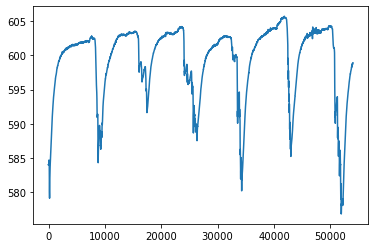

In [26]:
wellhead['head'].plot()

While a good start, we really want a useful x-axis. We don't really want to plot against the Index in this case, but rather the date and time. 

This short cut way of plotting with pandas (`DataFrame['columnname'].plot()`) is limiting, but we can now instead use MatPlotLib, the powerful Python plotting library. You can read more about that here: https://matplotlib.org/. There is a lot to go through, but here we are going to start simple by calling the plot function from the plot library that we imported. 

Note that we generally do not import all of MatPlotLib, but rather just the parts that we use. You can see this by referring to the first code block of Module 2.1 to see that we only import the portion that we want to use, `matplotlib.pyplot`. Remember that we need to call a function from this library, and `matplotlib.pyplot` would be a lot to type each time. Instead, we assign an alias, `plt`. The final thing you will note in the code block at the beginning of Module 2.1 is that we write a line of code: `%matplotlib inline`. This cleans up plotting in a Jupyter Notebook, you would not use this in Spyder or other Python IDE's. 

Let's replicate the plot from above using direct calls to MatPlotLib. The first argument is the data for the x-axis, and the second for the y-axis. 

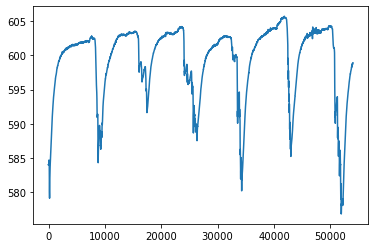

In [27]:
#plot the index as the x-axis and head as the y-axis
plt.plot(wellhead.index,wellhead['head'])

That's an improvement, but we still want to show dates and not indices, so let's sway out the index for the `TIMESTAMP` column in the dataframe. 

In [28]:
plt.plot(wellhead['TIMESTAMP'],wellhead['head'])

Error in callback <function flush_figures at 0x0000015AE7074430> (for post_execute):


KeyboardInterrupt: 

On my computer, that took a long time (go get a cup of coffee while this finishes up; you can also give up and hit the `Interupt the kernel` (aka the `STOP`) button above if you are tired of waiting)! Turns out, Pandas does not like making plots with text strings, which is exactly what the `TIMESTAMP` reads in as. Luckily, there is a little trick. Let's change the format of the date and time. Python/Pandas has a specific datatype for this called `Timestamp`. While this can get complicated to convert in some situations, I've started us with an easy example. We are going to use the function `pd.to_datetime()`, with the argument being the column representing the text timestamp string. I actually just want to overwrite this column with the desired data format, which the following code does. 

In [30]:
wellhead['TIMESTAMP'] = pd.to_datetime(wellhead['TIMESTAMP'])
wellhead



,RECORD,TIMESTAMP,depth_to_water_from_land_surface,head
0,0,2014-08-14 14:00:00,26.59,584.06
1,1,2014-08-14 15:00:00,26.58,584.07
2,2,2014-08-14 16:00:00,26.58,584.07
3,3,2014-08-14 17:00:00,26.59,584.06
4,4,2014-08-14 18:00:00,26.61,584.04
...,...,...,...,...
53992,67282,2020-11-20 10:00:00,11.73,598.92
53993,67283,2020-11-20 11:00:00,11.73,598.92
53994,67284,2020-11-20 12:00:00,11.73,598.92
53995,67285,2020-11-20 13:00:00,11.73,598.92


You'll notice that the output is very similar to what we have already seen. Pretty boring, right? Well, before anything else, let's just try plotting again. 

(16436.0, 18627.0)

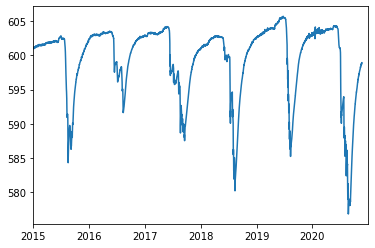

In [41]:
plt.plot(wellhead['TIMESTAMP'],wellhead['head'])
# I am using the function xlim to set the beginning and ending dates
plt.xlim([datetime.datetime(2015,1,1),datetime.datetime(2020,12,31)])

Oh, that was faster! You will also notice that the x-axis plots just years, but the values we fed in were years, months, day, hour, minutes, and seconds. How does Python/Pandas/Matplotlib know to do this? It is because our data is not a Timestamp object, and not a text string as before, and it makes some educated guesses about what we want to show.

Here's a little block of code that explores the data type that we originally read in and the convesaion.

In [33]:
#checking the type of the original TIMESTAMP
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/381651_HRY-91C_hyd.csv')
print(wellhead['TIMESTAMP'][0])
print(type(wellhead['TIMESTAMP'][0]))

2014-08-14 14:00:00
<class 'str'>


In [34]:
#checking the type of the converted TIMESTAMP to Timestamp
wellhead['TIMESTAMP'] = pd.to_datetime(wellhead['TIMESTAMP'])
print(wellhead['TIMESTAMP'][0])
print(type(wellhead['TIMESTAMP'][0]))

2014-08-14 14:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


To read more, check out: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html.

# Now try it on your own

You will be looking at sandstone data in your homework, let's look at some more here. In particular, let's plot water levels at two hydrographs with real-time data:

Elwood 7 (which is near the declining Joliet cone of depression)

DesPlaines 7 (near the Chicago airport and the recovering Elmhurst cone of depression)


https://www.isws.illinois.edu/groundwater-science/groundwater-monitoring-well-networks/deep-sandstone-network

If you want to watch me develop this code, check out this video: 
https://mediaspace.illinois.edu/media/t/1_7ns4t1kc

In [ ]:
# data to import, Elwood 7
#http://aqueduct.isws.illinois.edu/data/409818.csv

# data to import, DesPlaines 7
#http://aqueduct.isws.illinois.edu/data/410748.csv
    

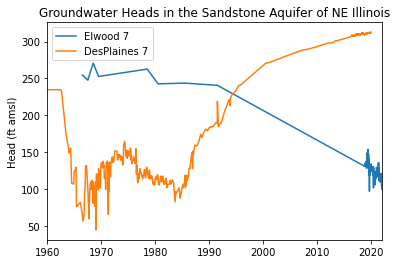

In [84]:
# write your code here










































In [ ]:
#answer
e7 = pd.read_csv('http://aqueduct.isws.illinois.edu/data/409818.csv')
e7['TIMESTAMP'] = pd.to_datetime(e7['TIMESTAMP'])

d7 = pd.read_csv('http://aqueduct.isws.illinois.edu/data/410748.csv')
d7['TIMESTAMP'] = pd.to_datetime(d7['TIMESTAMP'])

plt.plot(e7['TIMESTAMP'],e7['GWE'])
plt.plot(d7['TIMESTAMP'],d7['GWE'])

### Adding Details to your plot

The plot has the data, but is lacking in information. How will anybody know the title? The meaning of the axes? What the lines actually represent? Let's add this data.

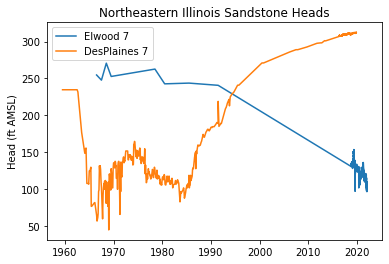

In [57]:
# note that you don't have to write everything separely, you can also add multiple x,y data pairs as arguments as follows
plt.plot(e7['TIMESTAMP'],e7['GWE'],label='Elwood 7')
plt.plot(d7['TIMESTAMP'],d7['GWE'],label='DesPlaines 7')
plt.ylabel('Head (ft AMSL)')
plt.title('Northeastern Illinois Sandstone Heads')
plt.legend()